In [12]:
import gymnasium as gym
from gymnasium import RewardWrapper


from pathlib import Path
from typing import NamedTuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

class Params(NamedTuple):
    total_episodes: int  # Total episodes
    learning_rate: float  # Learning rate
    gamma: float  # Discounting rate
    epsilon: float  # Exploration probability
    map_row_size: int  # Number of rows of the environment
    map_col_size: int # Number of columns of the environment
    seed: int  # Define a seed so that we get reproducible results
    is_slippery: bool  # If true the player will move in intended direction with probability of 1/3 else will move in either perpendicular direction with equal probability of 1/3 in both directions
    n_runs: int  # Number of runs
    action_size: int  # Number of possible actions
    state_size: int  # Number of possible states
    proba_frozen: float  # Probability that a tile is frozen
    savefig_folder: Path  # Root folder where plots are saved

In [13]:
desc = ["FFFG","FHFH","SFFF"]
env = gym.make(
    'FrozenLake-v1',
    render_mode="rgb_array", 
    desc=desc, 
    map_name="3x4", 
    is_slippery=True)
print(f"Action space: {env.action_space}")
print(f"State space: {env.observation_space}")

env.reset()

params = Params(
    total_episodes=2000,
    learning_rate=0.8,
    gamma=0.95,
    epsilon=0.1,
    map_row_size=len(desc),
    map_col_size=len(desc[0]),
    seed=123,
    is_slippery=False,
    n_runs=20,
    action_size=None,
    state_size=None,
    proba_frozen=0.9,
    savefig_folder=Path("/home/manu/manuLinux/these/cours/reinforcement_learning/practical/grid_world/img/step_by_step_tutorial/")
)

# Create the figure folder if it doesn't exists
params.savefig_folder.mkdir(parents=True, exist_ok=True)

Action space: Discrete(4)
State space: Discrete(12)


In [14]:
def plot_env(frame_title: str):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
    ax.imshow(env.render())
    ax.axis("off")
    ax.set_title("Frame "+frame_title)
    img_title = f"frozenlake_env_frame_{frame_title}.png"
    fig.savefig(params.savefig_folder / img_title, bbox_inches="tight")
    plt.show()

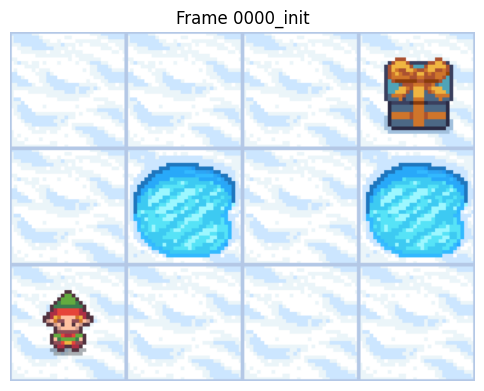

In [15]:
plot_env("0000_init")

In [16]:
# Custom Reward Wrapper
class CustomRewardWrapper(RewardWrapper):
    """
    Allows to make reward be -1 for a hole
    """
    def __init__(self, env):
        super(CustomRewardWrapper, self).__init__(env)
        self.reward_range = (-1, 1)

    def reward(self, reward):
        """Modify the reward."""
        # Check the agent's current state
        if b'H' == self.env.unwrapped.desc[self.env.s // self.env.ncol][self.env.s % self.env.ncol]:  # 'H' represents a hole
            return -1  # Set reward to -1 if the agent is in a hole
        return reward  # Otherwise, keep the original reward

# Wrap the environment with the custom reward wrapper
env = CustomRewardWrapper(env)

# Example of running the environment
observation = env.reset()